Описание данных:
- age - возраст покупателей
- DebtRatio - отношение месячных платежей к суммарному месячному доходу
- NumberOfTime30-59DaysPastDueNotWorse - число случаев, когда клиент просрочил выплату на 30-59 дней
- NumberOfTimes90DaysLate - число случаев, когда клиент просрочил на 90+ дней кредит
- NumberOfTime60-89DaysPastDueNotWorse - число случаев, когда клиент просрочил кредит на 60-89 дней
- NumberOfDependents - число иждивенцев
- SeriousDlqin2yrs - целевая переменна

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# загрузим данные
data = pd.read_csv('data/credit_scoring.csv')
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


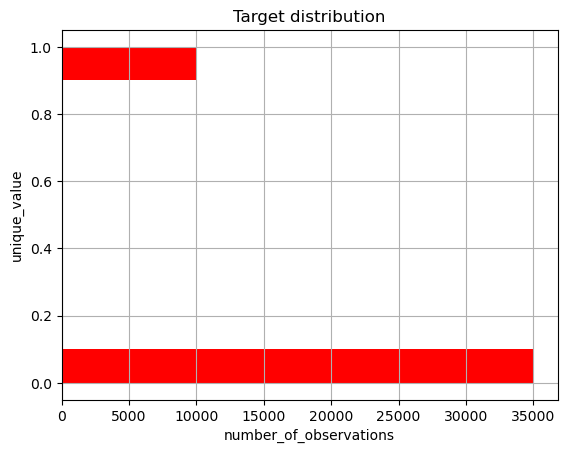

In [11]:
# Посмотрим как выглядит распределение целевой переменной
ax = data['SeriousDlqin2yrs'].hist(orientation='horizontal', color='red')
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")
plt.show()

In [12]:
print('Distribution of the target:')
data['SeriousDlqin2yrs'].value_counts()/data.shape[0]

Distribution of the target:


SeriousDlqin2yrs
0    0.777511
1    0.222489
Name: count, dtype: float64

In [4]:
cols_fill = [col for col in data.columns if col != "SeriousDlqin2yrs"]
for c in cols_fill:
    data[c] = data[c].fillna(data[c].median())

In [5]:
X = data[cols_fill]
y = data['SeriousDlqin2yrs']

In [6]:
lr = LogisticRegression(random_state=13, class_weight='balanced', solver='liblinear')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}

gs = GridSearchCV(estimator=lr, param_grid=parameters,cv=skf)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      45063 non-null  int64  
 1   age                                   45063 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  45063 non-null  int64  
 3   DebtRatio                             45063 non-null  float64
 4   NumberOfTimes90DaysLate               45063 non-null  int64  
 5   NumberOfTime60-89DaysPastDueNotWorse  45063 non-null  int64  
 6   MonthlyIncome                         45063 non-null  float64
 7   NumberOfDependents                    45063 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


In [14]:
data.describe()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
count,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,4.506300e+04,45063.000000
mean,0.222489,51.210949,0.750993,352.062688,0.570712,0.505870,6.205560e+03,0.770055
std,0.415922,14.651533,6.184521,2467.556358,6.173106,6.153609,1.137297e+04,1.123438
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,40.000000,0.000000,0.176373,0.000000,0.000000,3.721000e+03,0.000000
50%,0.000000,51.000000,0.000000,0.373949,0.000000,0.000000,5.166000e+03,0.000000
75%,0.000000,62.000000,0.000000,0.857027,0.000000,0.000000,7.121500e+03,1.000000
max,1.000000,107.000000,98.000000,326442.000000,98.000000,98.000000,1.794060e+06,10.000000


In [15]:
data[data['SeriousDlqin2yrs']==1]['age'].mean()

45.92659086375424

In [16]:
data[data['SeriousDlqin2yrs']==0]['age'].mean()

52.723092730542

In [17]:
lr = LogisticRegression(random_state=13, class_weight='balanced', solver='liblinear')
parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

gs = GridSearchCV(lr, parameters, cv=skf).fit(X, y)

In [18]:
gs.best_params_

{'C': 0.0001}

In [20]:
gs.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', random_state=13,
                   solver='liblinear')